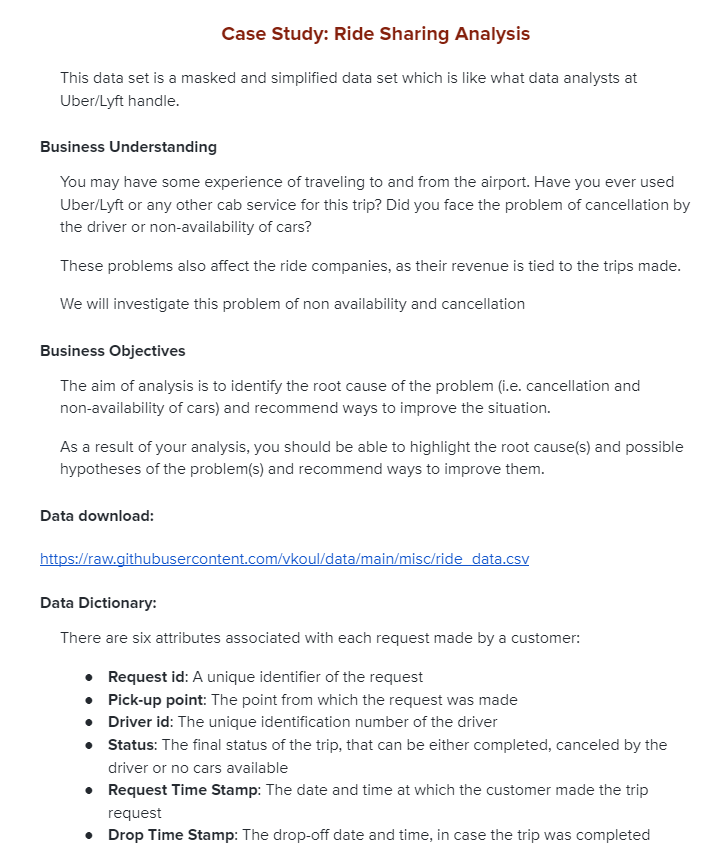


Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Importing the data 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv")

checking the df

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,11/07/2016 00:20,11/07/2016 00:51
1,2,Airport,NaN,No Cars Available,11/07/2016 00:23,NaN
2,3,Airport,80.0,Trip Completed,11/07/2016 00:24,11/07/2016 01:31
3,4,City,NaN,No Cars Available,11/07/2016 00:37,NaN
4,5,Airport,264.0,Trip Completed,11/07/2016 00:36,11/07/2016 01:35
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,15/07/2016 00:07,15/07/2016 00:52
6741,6763,City,224.0,Trip Completed,15/07/2016 00:04,15/07/2016 01:06
6742,6764,City,243.0,Trip Completed,15/07/2016 00:06,15/07/2016 01:17
6743,6765,Airport,NaN,No Cars Available,15/07/2016 00:09,NaN


checking the data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Dates are stored as objects; converting them to datetime:

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv", parse_dates = 
                 ["Request timestamp","Drop timestamp"])

In [6]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


Data Quality Check (looking forn null and missing values)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


df.isna().sum() #there are null values in the driver id column column and in drop time stamp

The following is a way to get the percentage of missing values for each column and 
rounding them to one decimal

In [8]:
df.isna().mean().round(2)*100 

Request id            0.0
Pickup point          0.0
Driver id            39.0
Status                0.0
Request timestamp     0.0
Drop timestamp       58.0
dtype: float64

The following is an alternative methos to get the percentage of na. It is dividing the number of rows with null values by the total number of rows (obtained by calling shape). Remember shape will show first number of rows and then number of columns. By calling [0] you retrive just the number of rows.

In [9]:
df.isna().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

As I want to understand better why there are null alues fir the driver id, In the code below I am filtering the column driver id by null values:(calling the first 30 rows)

In [10]:
df.loc[df["Driver id"].isna()].head(30)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
5,6,City,NaN,No Cars Available,2016-11-07 00:36:00,NaT
6,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT
7,8,City,NaN,No Cars Available,2016-11-07 00:40:00,NaT
11,12,City,NaN,No Cars Available,2016-11-07 01:08:00,NaT
13,14,Airport,NaN,No Cars Available,2016-11-07 01:10:00,NaT
14,15,City,NaN,No Cars Available,2016-11-07 01:15:00,NaT
15,16,Airport,NaN,No Cars Available,2016-11-07 01:09:00,NaT
16,17,Airport,NaN,No Cars Available,2016-11-07 01:16:00,NaT


From the first 30 rows looks like all the rows where drier id is null, has the status "No Cars Available". This means no trip was done (hence no driver id), as well as nodrop timestamp. To confirm the above, I will check throughtout the column driver id = null, if "no car available was the only status. With the following 2 methods below:

remember to spcify the column after the filtering.

In [11]:
df.loc[df["Driver id"].isna()]["Status"].describe() 

# with describe() I would normally get a summary of the 
# central tendency of the data (if I have float data type), otherwise just 
# a count and unique values if the datatype is a string

count                  2650
unique                    1
top       No Cars Available
freq                   2650
Name: Status, dtype: object

In [12]:
df.loc[df["Driver id"].isna()]["Status"].value_counts() 

# a more explict way of doing the operation in the previous code lineabove, by counting the values in 
# a specific column

No Cars Available    2650
Name: Status, dtype: int64

Checking the null values for column "Drop timestamp"

In [13]:
df.loc[df["Drop timestamp"].isna()].head(50)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
5,6,City,NaN,No Cars Available,2016-11-07 00:36:00,NaT
6,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT
7,8,City,NaN,No Cars Available,2016-11-07 00:40:00,NaT
11,12,City,NaN,No Cars Available,2016-11-07 01:08:00,NaT
13,14,Airport,NaN,No Cars Available,2016-11-07 01:10:00,NaT
14,15,City,NaN,No Cars Available,2016-11-07 01:15:00,NaT
15,16,Airport,NaN,No Cars Available,2016-11-07 01:09:00,NaT
16,17,Airport,NaN,No Cars Available,2016-11-07 01:16:00,NaT


In [14]:
df.loc[df["Drop timestamp"].isna()]["Status"].value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

for drop timestamp = NaN, seems occuring when there are no car available or the trip is cancelled 

## Data Cleaning and Preparation

**Cleaning the column name**
* lowercase
* replace space with underscore

In [15]:
df.columns.str.lower() # simply calling the method, it will not make the chnages permanent, it needs to be defined at df level

Index(['request id', 'pickup point', 'driver id', 'status',
       'request timestamp', 'drop timestamp'],
      dtype='object')

In [16]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


In [17]:
df.columns = df.columns.str.lower()

In [18]:
df

,request id,pickup point,driver id,status,request timestamp,drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


In [19]:
df.columns = df.columns.str.replace(" ","_")

In [20]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


In the line below I will extract relavant information from the 2 columns with a tiimestamp ( request and drop time), so I can then create summary or viz for thos info

Requested Timesamp

In [21]:
df["request_year"] = df["request_timestamp"].dt.year

In [22]:
df["request_month"] = df["request_timestamp"].dt.month

In [23]:
df["request_day"] = df["request_timestamp"].dt.day_name()

In [24]:
df["request_hour"] = df["request_timestamp"].dt.hour

In [25]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,Monday,0
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,Monday,0
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,Monday,0
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,Monday,0
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,Monday,0
...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,Friday,0
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,Friday,0
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,Friday,0
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,Friday,0


Drop Timesamp

In [26]:
df["drop_year"] = df["drop_timestamp"].dt.year

In [27]:
df["drop_month"] = df["drop_timestamp"].dt.month

In [28]:
df["drop_day"] = df["drop_timestamp"].dt.day_name()

In [29]:
df["drop_hour"] = df["drop_timestamp"].dt.hour

In [30]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,drop_year,drop_month,drop_day,drop_hour
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,Monday,0,2016.0,11.0,Monday,0.0
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,Friday,0,2016.0,7.0,Friday,0.0
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,Friday,0,NaN,NaN,NaN,NaN


calculating the trip time in the code below:

In [31]:
df["journey_time"] = (df["drop_timestamp"] - df["request_timestamp"])


In [32]:
df["journey_hours"] = df["journey_time"] / pd.Timedelta(hours=1)

In [33]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,drop_year,drop_month,drop_day,drop_hour,journey_time,journey_hours
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,Monday,0,2016.0,11.0,Monday,0.0,0 days 00:31:00,0.516667
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN,NaT,NaN
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0,0 days 01:07:00,1.116667
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN,NaT,NaN
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0,0 days 00:59:00,0.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,Friday,0,2016.0,7.0,Friday,0.0,0 days 00:45:00,0.750000
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0,0 days 01:02:00,1.033333
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0,0 days 01:11:00,1.183333
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,Friday,0,NaN,NaN,NaN,NaN,NaT,NaN


Exploratory Data Analysis (EDA)

In [34]:
df.groupby("driver_id")["journey_time"].mean()

driver_id
1.0               0 days 00:51:40
2.0     0 days 00:49:33.333333333
3.0               0 days 00:49:42
4.0               0 days 00:49:18
5.0     0 days 00:56:16.363636363
                   ...           
296.0          -12 days +03:17:00
297.0   0 days 00:52:49.090909090
298.0   0 days 00:54:16.363636363
299.0   0 days 00:49:25.714285714
300.0             0 days 00:51:48
Name: journey_time, Length: 300, dtype: timedelta64[ns]

In [35]:
df.loc[df["journey_hours"] < 0].count()

request_id           13
pickup_point         13
driver_id            13
status               13
request_timestamp    13
drop_timestamp       13
request_year         13
request_month        13
request_day          13
request_hour         13
drop_year            13
drop_month           13
drop_day             13
drop_hour            13
journey_time         13
journey_hours        13
dtype: int64

In [36]:
zero_hours = df.loc[df['journey_hours'] < 0].index


In [37]:
df.drop(zero_hours , inplace=True)

In [38]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_hour,drop_year,drop_month,drop_day,drop_hour,journey_time,journey_hours
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,Monday,0,2016.0,11.0,Monday,0.0,0 days 00:31:00,0.516667
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN,NaT,NaN
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0,0 days 01:07:00,1.116667
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,Monday,0,NaN,NaN,NaN,NaN,NaT,NaN
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,Monday,0,2016.0,11.0,Monday,1.0,0 days 00:59:00,0.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,Friday,0,2016.0,7.0,Friday,0.0,0 days 00:45:00,0.750000
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0,0 days 01:02:00,1.033333
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,Friday,0,2016.0,7.0,Friday,1.0,0 days 01:11:00,1.183333
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,Friday,0,NaN,NaN,NaN,NaN,NaT,NaN


In [39]:
df.describe() # this is done on float values

,request_id,driver_id,request_year,request_month,request_hour,drop_year,drop_month,drop_hour,journey_time,journey_hours
count,6732.000000,4082.000000,6732.0,6732.000000,6732.000000,2818.0,2818.000000,2818.000000,2818,2818.000000
mean,3386.030154,149.514209,2016.0,8.773321,12.937314,2016.0,8.833925,12.937899,0 days 05:33:58.317955997,5.566199
std,1956.732310,86.023224,0.0,2.215948,6.495322,0.0,2.232038,6.434789,2 days 08:58:25.936816313,56.973871
min,1.000000,1.000000,2016.0,7.000000,0.000000,2016.0,7.000000,0.000000,0 days 00:21:00,0.350000
25%,1687.750000,75.000000,2016.0,7.000000,7.000000,2016.0,7.000000,8.000000,0 days 00:41:00,0.683333
50%,3393.500000,149.000000,2016.0,7.000000,13.000000,2016.0,7.000000,13.000000,0 days 00:52:00,0.866667
75%,5083.250000,224.000000,2016.0,11.000000,19.000000,2016.0,11.000000,19.000000,0 days 01:04:00,1.066667
max,6766.000000,300.000000,2016.0,12.000000,23.000000,2016.0,12.000000,23.000000,29 days 01:15:00,697.250000


In [40]:
df.describe(include = "O") # this is done on strings value

,pickup_point,status,request_day,drop_day
count,6732,6732,6732,2818
unique,2,3,4,5
top,City,Trip Completed,Wednesday,Wednesday
freq,3505,2818,2631,1124


EDA on status

In [41]:
df["status"].value_counts()

Trip Completed       2818
No Cars Available    2650
Cancelled            1264
Name: status, dtype: int64

In [42]:
df["status"].value_counts(normalize = True).round(3)*100 # only 42% of the trip were completed, 39% were not available, 
                                                         # 19% cancelled

Trip Completed       41.9
No Cars Available    39.4
Cancelled            18.8
Name: status, dtype: float64

<AxesSubplot:ylabel='status'>

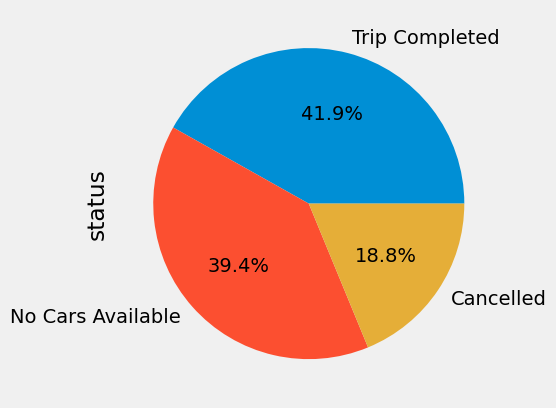

In [43]:
df["status"].value_counts(normalize = True).plot(kind = "pie", autopct="%.1f%%")

More specific analysis on status by city

In [44]:
pd.crosstab(df["status"],df["pickup_point"])

pickup_point,Airport,City
status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1316,1502


In [45]:
pd.crosstab(df["status"],df["pickup_point"],normalize = "index").round(3)*100 

pickup_point,Airport,City
status,,
Cancelled,15.7,84.3
No Cars Available,64.6,35.4
Trip Completed,46.7,53.3


seems most of the trips are cancelled when the pickup point is the city (hence user is going to the airport) - maybe the user is cancelling when does not see the taxi coming for fear of missing the flight? 

Since the majority of no cars availble happens is in the airport, seems that the drivers are trying to supply as many rides as 
possible when picking up from the city, but not enough to avoid trips cancellation and of course provide rides from the airpot.

In [46]:
df.groupby(["status","pickup_point"])["status"].count() #alternative way of getting the aboVE


status             pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1316
                   City            1502
Name: status, dtype: int64

<AxesSubplot:xlabel='status'>

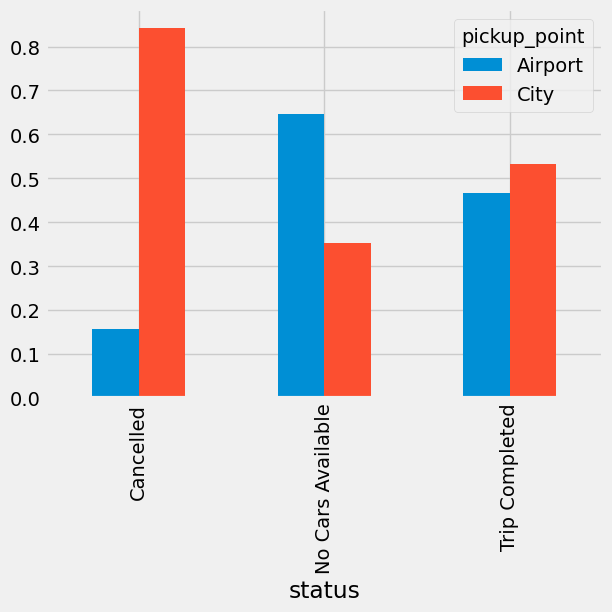

In [47]:
pd.crosstab(df["status"],df["pickup_point"],normalize = "index").plot(kind = "bar")

lookig for the busies hours:


<AxesSubplot:xlabel='request_hour'>

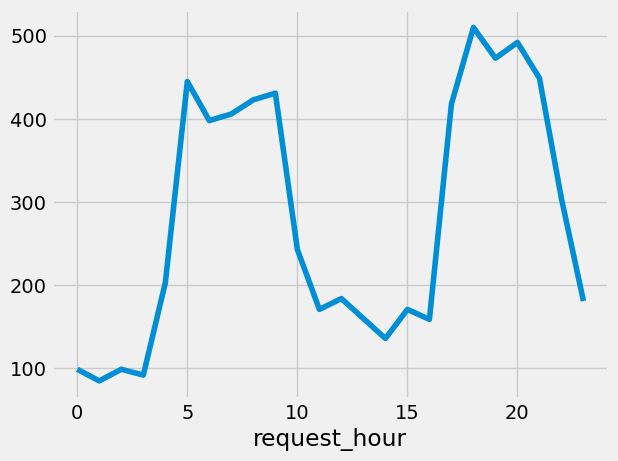

In [57]:
df.groupby('request_hour')['request_id'].count().plot(kind = 'line')


The busiest time seems to be between 5-10 am in the morning and 18-20 in he night, however, the plot above has both pickup points, so it would be better to split bu pickup point

<AxesSubplot:xlabel='request_hour'>

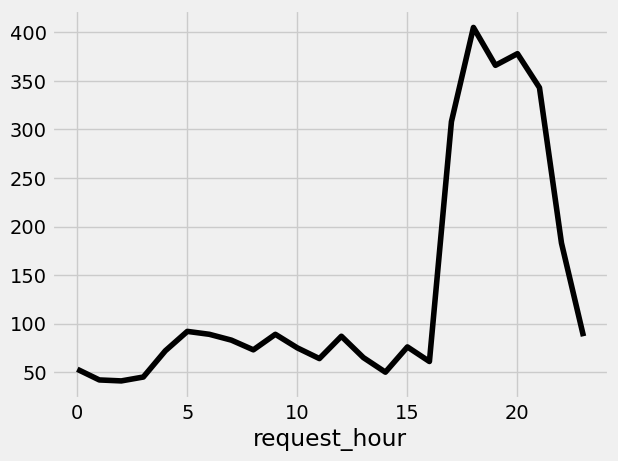

In [49]:
(df
 .query('pickup_point == "Airport"')
 .groupby('request_hour')['request_id'].count().plot(kind = 'line', color='black'))
 
# busiest hours with pick up point = airport is in the night

<AxesSubplot:xlabel='request_hour'>

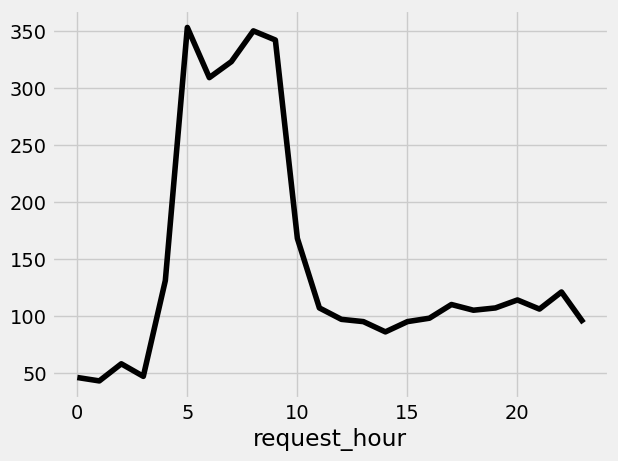

In [50]:
(df
 .query('pickup_point == "City"')
 .groupby('request_hour')['request_id'].count().plot(kind = 'line', color='black'))

# busiest hours going with pickup point = city is in the morning

<AxesSubplot:xlabel='request_hour'>

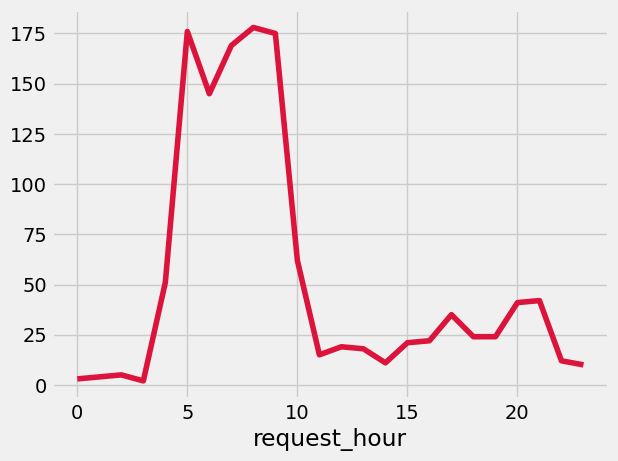

In [51]:
(df
 .query('status == "Cancelled"')
 .groupby('request_hour')['status'].count().plot(kind = 'line',color='crimson' ))

# further confirmation by the fact that trip cancellettion occurs more in the morning, when 
# there is he pick of call from the city 

<AxesSubplot:xlabel='request_hour'>

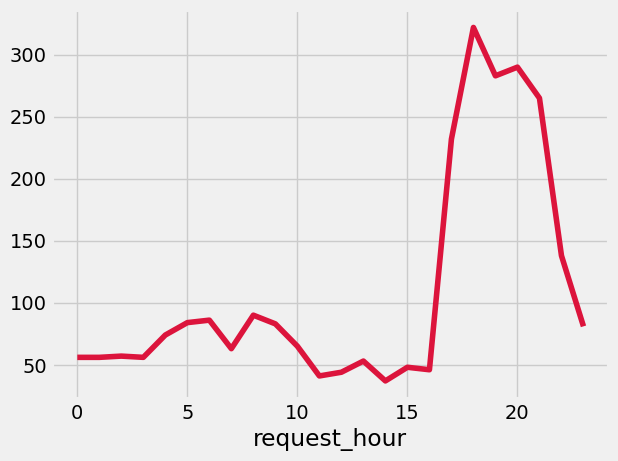

In [52]:
(df
 .query('status == "No Cars Available"')
 .groupby('request_hour')['status'].count().plot(kind = 'line', color='crimson'))

<AxesSubplot:xlabel='request_hour'>

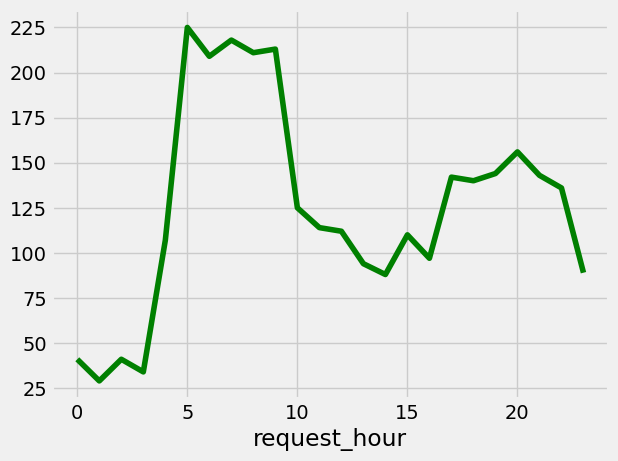

In [58]:
df.groupby('request_hour')['driver_id'].nunique().plot(kind = 'line', color='green')


Conclusions:

Most of the drivers work in the morning, however, there are not enough driver in the morning to supply enough rides to the customers since people are anyway cancelling. The morning is the period of time where a customer is more likely to cancel.  

Less driver are working in the evening but howver not enough to supply rides to the customers since the company has no cars available.

Considering the above, the company has 2 issues: having more cars out riding both in the evening and in the morning. Howver, the company should first focus on providing more rides in the evening when they have no cars avaibale since this alone would increse their rides of 40%. 

Secondly, the company should focus on providing more cars in the morning, the remaining 19% of the problematic trips.